<div class="alert alert-block alert-success">
<h3>Conclusiones</h3>
</div>

In [31]:
%pip install -r ../requirements.txt

Looking in indexes: https://pypi.python.org/simple

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
raw_data_path='../data/raw/road_traffic_accidents_dataset.csv'
df = pd.read_csv(raw_data_path)

<div class="alert alert-block alert-danger">
<h5>Lesividad hombres / mujeres</h5>
</div>

In [39]:
# Create the contingency table
contingency_table = pd.crosstab(
    index=df['Sex_of_driver'].loc[df['Sex_of_driver'] != "Unknown"],
    columns=df['Accident_severity'],
    margins=True
)

# Calculate and display the probabilities for each type of severity
for severity in contingency_table.columns[:-1]:  # Exclude 'All' column
    if severity in contingency_table.columns:
        prob_female = contingency_table.loc['Female', severity] / contingency_table.loc['Female', 'All']
        prob_male = contingency_table.loc['Male', severity] / contingency_table.loc['Male', 'All']
        
        print(f"P(Gender = Female | Severity = {severity}) \t= \t{prob_female:.3f}")
        print(f"P(Gender = Male   | Severity = {severity}) \t= \t{prob_male:.3f}")
        print()
        
# Display the contingency table
print(contingency_table)

P(Gender = Female | Severity = Fatal injury) 	= 	0.007
P(Gender = Male   | Severity = Fatal injury) 	= 	0.013

P(Gender = Female | Severity = Serious Injury) 	= 	0.148
P(Gender = Male   | Severity = Serious Injury) 	= 	0.142

P(Gender = Female | Severity = Slight Injury) 	= 	0.845
P(Gender = Male   | Severity = Slight Injury) 	= 	0.845

Accident_severity  Fatal injury  Serious Injury  Slight Injury    All
Sex_of_driver                                                        
Female                        5             104            592    701
Male                        152            1621           9664  11437
All                         157            1725          10256  12138


<div class="alert alert-block alert-info">
<p>No existe diferencia entre ambos sexos</p>
</div>

---
---

In [47]:
# Create a contingency table showing counts of different severities for each collision type
contingency_table = pd.crosstab(
    index=data['Type_of_collision'],
    columns=data['Accident_severity'],
    margins=True,
    margins_name='Total'
)

print(contingency_table)

Accident_severity                        Fatal injury  Serious Injury  \
Type_of_collision                                                       
Collision with animals                              2              27   
Collision with pedestrians                         22             141   
Collision with roadside objects                    24             272   
Collision with roadside-parked vehicles             0               5   
Fall from vehicles                                  0               4   
Other                                               0               3   
Rollover                                            4              54   
Unknown                                             0               1   
Vehicle with vehicle collision                    104            1203   
With Train                                          0               2   
Total                                             156            1712   

Accident_severity                        Slight In

In [48]:
# Calculate the proportion of each severity type for each collision type
# Adding a new row and column for proportions
proportions = contingency_table.div(contingency_table.loc['Total'], axis=1)

print(proportions)

Accident_severity                        Fatal injury  Serious Injury  \
Type_of_collision                                                       
Collision with animals                       0.012821        0.015771   
Collision with pedestrians                   0.141026        0.082360   
Collision with roadside objects              0.153846        0.158879   
Collision with roadside-parked vehicles      0.000000        0.002921   
Fall from vehicles                           0.000000        0.002336   
Other                                        0.000000        0.001752   
Rollover                                     0.025641        0.031542   
Unknown                                      0.000000        0.000584   
Vehicle with vehicle collision               0.666667        0.702687   
With Train                                   0.000000        0.001168   
Total                                        1.000000        1.000000   

Accident_severity                        Slight In

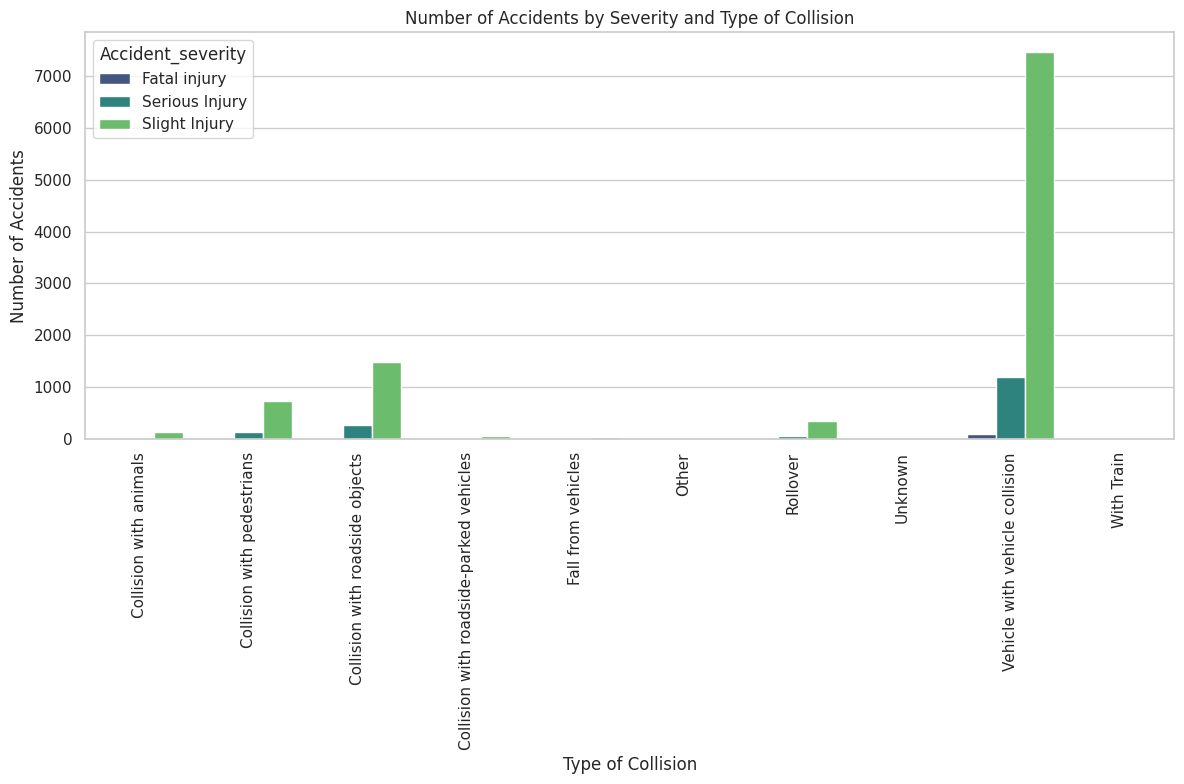

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Total' row and column for plotting
plot_data = contingency_table.drop('Total').drop('Total', axis=1)

# Reset index for plotting
plot_data = plot_data.reset_index()

# Melt the DataFrame to long format for seaborn
plot_data_melted = plot_data.melt(id_vars='Type_of_collision', var_name='Accident_severity', value_name='Count')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Type_of_collision', y='Count', hue='Accident_severity', data=plot_data_melted, palette='viridis')

# Add titles and labels
plt.title('Number of Accidents by Severity and Type of Collision')
plt.xlabel('Type of Collision')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()
